In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)


In [ ]:
def create_model_l1(l1_rate):
    model = Sequential()

    model.add(Conv3D(128, 3, input_shape=(28, 100, 100, 1), padding='same', kernel_regularizer=l1(l1_rate)))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Conv3D(256, 3, padding='same', kernel_regularizer=l1(l1_rate)))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Conv3D(75, 3, padding='same', kernel_regularizer=l1(l1_rate)))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Reshape((75, 2*12*12)))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(10, activation='softmax'))

    return model


In [ ]:
l1_rate = 0.001
model = create_model_l1(l1_rate)

model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()

t1 = time.time()
plot = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_15 (Conv3D)                   │ (None, 22, 100, 100, 128)   │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 22, 100, 100, 128)   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_15 (MaxPooling3D)      │ (None, 11, 50, 50, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_16 (Conv3D)                   │ (None, 11, 50, 50, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 11, 50, 50, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_16 (MaxPooling3D)      │ (None, 5, 25, 25, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_17 (Conv3D)                   │ (None, 5, 25, 25, 75)       │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 5, 25, 25, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_17 (MaxPooling3D)      │ (None, 2, 12, 12, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 75, 288)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 75, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 75, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          48,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,069 (5.96 MB)

 Trainable params: 1,562,069 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 580ms/step - accuracy: 0.2864 - loss: 15.4156 - val_accuracy: 0.3571 - val_loss: 6.0758
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 531ms/step - accuracy: 0.3496 - loss: 4.8419 - val_accuracy: 0.4286 - val_loss: 2.9487
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 531ms/step - accuracy: 0.2629 - loss: 2.7066 - val_accuracy: 0.3571 - val_loss: 1.9374
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 556ms/step - accuracy: 0.3814 - loss: 1.8293 - val_accuracy: 0.3571 - val_loss: 1.5240
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 524ms/step - accuracy: 0.3379 - loss: 1.5128 - val_accuracy: 0.3571 - val_loss: 1.3558
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.4308 - loss: 1.3758 - val_accuracy: 0.6429 - val_loss: 1.2820
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - accuracy: 0.4832 - loss: 1.3043 - val_accuracy: 0.6429 - val_loss: 1.1205
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 506ms/step - accuracy: 0.6731 - loss: 1.1244 - val_accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8462 - loss: 0.5127
Test loss: 0.5126804113388062, Test accuracy: 0.8461538553237915


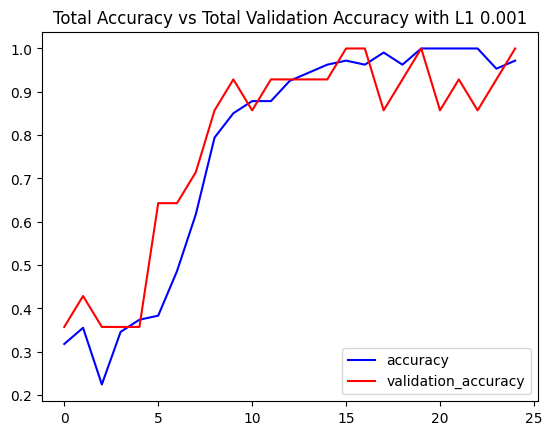

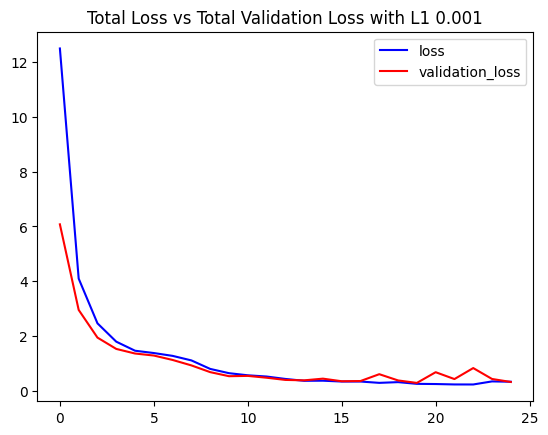

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

plt.plot(plot.history['accuracy'], 'blue', label='accuracy')
plt.plot(plot.history['val_accuracy'], 'red', label='validation_accuracy')
plt.title(f"Total Accuracy vs Total Validation Accuracy with L1 {l1_rate}")
plt.legend()
plt.show()

plt.plot(plot.history['loss'], 'blue', label='loss')
plt.plot(plot.history['val_loss'], 'red', label='validation_loss')
plt.title(f"Total Loss vs Total Validation Loss with L1 {l1_rate}")
plt.legend()
plt.show()


In [ ]:
# from tensorflow.keras.regularizers import l1
# import numpy as np

# l1_rates = [0.0001, 0.001, 0.01, 0.1]

# for l1_rate in l1_rates:
#     print(f"Testing L1 regularization rate: {l1_rate}")
#     model = create_model_l1(l1_rate)
#     model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

#     t1 = time.time()
#     plot = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8, verbose=1)
#     t2 = time.time()
#     print(f"Training time : {t2 - t1} sec")

#     test_loss, test_accuracy = model.evaluate(X_test, y_test)
#     print(f"L1 rate: {l1_rate} - Test loss: {test_loss}, Test accuracy: {test_accuracy}")

#     plt.plot(plot.history['accuracy'], label=f'accuracy (L1={l1_rate})')
#     plt.plot(plot.history['val_accuracy'], label=f'validation_accuracy (L1={l1_rate})')
#     plt.title(f"Accuracy vs Validation Accuracy with L1 {l1_rate}")
#     plt.legend()
#     plt.show()

#     plt.plot(plot.history['loss'], label=f'loss (L1={l1_rate})')
#     plt.plot(plot.history['val_loss'], label=f'validation_loss (L1={l1_rate})')
#     plt.title(f"Loss vs Validation Loss with L1 {l1_rate}")
#     plt.legend()
#     plt.show()
